## Taobao User Behavior Analysis

### Background
1. The project is based on a dataset of user behaviors from Taobao collected by Alibaba (url: https://tianchi.aliyun.com/dataset/649)<br>
<br>
2. Columns: User ID: An integer, the serialized ID that represents a user<br>
    Item ID: An integer, the serialized ID that represents an item<br>
    Category ID: An integer, the serialized ID that represents the category which the corresponding item belongs to<br>
    Behavior type: A string, enum-type from ('pv', 'buy', 'cart', 'fav')<br>
    Timestamp: An integer, the timestamp of the behavior<br>
<br>
3. pv:	Page view of an item's detail page, equivalent to an item click<br>
    buy:	Purchase an item<br>
    cart:	Add an item to shopping cart<br>
    fav:	Favor an item<br>
<br>
4. The analysis would focus on traffic analysis and user value analysis.

### Preparation

In [1]:
# Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
user_data = pd.read_csv('/Users/alkaid/Downloads/UserBehavior.csv')

In [3]:
# Input column name
name = ['user_id','item_id','category_id','behavior_type','timestamp']
user_data.columns = name
user_data.head()

,user_id,item_id,category_id,behavior_type,timestamp
0,1,2333346,2520771,pv,1511561733
1,1,2576651,149192,pv,1511572885
2,1,3830808,4181361,pv,1511593493
3,1,4365585,2520377,pv,1511596146
4,1,4606018,2735466,pv,1511616481


In [4]:
# Data brief
print('Size of data: ',len(user_data))
print('Number of users: ',len(set(user_data['user_id'])))
print('Number of products: ',len(set(user_data['item_id'])))
print('Number of product types: ',len(set(user_data['category_id'])))

Size of data:  100150806
Number of users:  987994
Number of products:  4162024
Number of product types:  9439


In [ ]:
from pyecharts.charts import Pie
from pyecharts import options as opts

# Check user behavior distribution
cate = ['Browse','Add to the wishlist','Add to the cart','Buy']
data = [int(i) for i in list(user_data['behavior_type'].value_counts().values)]

pie = (Pie()
       .add('', [list(z) for z in zip(cate, data)],
            radius=["30%", "75%"],
            rosetype="radius"
            )
       .set_global_opts(title_opts=opts.TitleOpts(title="User Behavior Distribution"))
       .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%"))
      )

pie.render_notebook()

### Preprocessing

In [6]:
# Drop null if necessary
user_data.isnull().sum()

user_id          0
item_id          0
category_id      0
behavior_type    0
timestamp        0
dtype: int64

In [4]:
# Convert timestamp to datetime, utc+8 time zone!!
import datetime
user_data['timestamp'] = pd.to_datetime(user_data['timestamp'], unit='s') + datetime.timedelta(hours = 8)
user_data = user_data[(user_data.timestamp>=datetime.datetime.strptime("2017-01-01 00:00:00","%Y-%m-%d %H:%M:%S"))
        &(user_data.timestamp<=datetime.datetime.strptime("2017-12-31 23:59:59","%Y-%m-%d %H:%M:%S"))]
user_data.head()

,user_id,item_id,category_id,behavior_type,timestamp
0,1,2333346,2520771,pv,2017-11-25 06:15:33
1,1,2576651,149192,pv,2017-11-25 09:21:25
2,1,3830808,4181361,pv,2017-11-25 15:04:53
3,1,4365585,2520377,pv,2017-11-25 15:49:06
4,1,4606018,2735466,pv,2017-11-25 21:28:01


In [5]:
# Split date and time
user_data['timestamp'] = pd.to_datetime(user_data['timestamp'], unit='s')
user_data.loc[:, 'date'] = user_data['timestamp'].dt.date
user_data.loc[:, 'hour'] = user_data['timestamp'].dt.hour
user_data.head()

,user_id,item_id,category_id,behavior_type,timestamp,date,hour
0,1,2333346,2520771,pv,2017-11-25 06:15:33,2017-11-25,6
1,1,2576651,149192,pv,2017-11-25 09:21:25,2017-11-25,9
2,1,3830808,4181361,pv,2017-11-25 15:04:53,2017-11-25,15
3,1,4365585,2520377,pv,2017-11-25 15:49:06,2017-11-25,15
4,1,4606018,2735466,pv,2017-11-25 21:28:01,2017-11-25,21


In [9]:
# The range of dates
print('The range of dates is',len(set(user_data['date'])),'days')

The range of dates is 138 days


In [10]:
user_data.dtypes

user_id                   int64
item_id                   int64
category_id               int64
behavior_type            object
timestamp        datetime64[ns]
date                     object
hour                      int64
dtype: object

In [6]:
user_data['user_id'] = user_data['user_id'].astype('object')
user_data['item_id'] = user_data['item_id'].astype('object')
user_data['category_id'] = user_data['category_id'].astype('object')
user_data['date'] = pd.to_datetime(user_data['date'])
user_data.dtypes

user_id                  object
item_id                  object
category_id              object
behavior_type            object
timestamp        datetime64[ns]
date             datetime64[ns]
hour                      int64
dtype: object

### Traffic Analysis

Based on date:

In [12]:
# Daily Page View
# PV: select count(user_id) from user_data group by "date";
pv_data = user_data[user_data['behavior_type'] == 'pv']
pv_daily = pv_data.groupby('date')['user_id'].count().reset_index(name='pv_daily')
pv_daily.head()

,date,pv_daily
0,2017-03-21,1
1,2017-04-02,1
2,2017-04-05,1
3,2017-04-11,9
4,2017-04-12,12


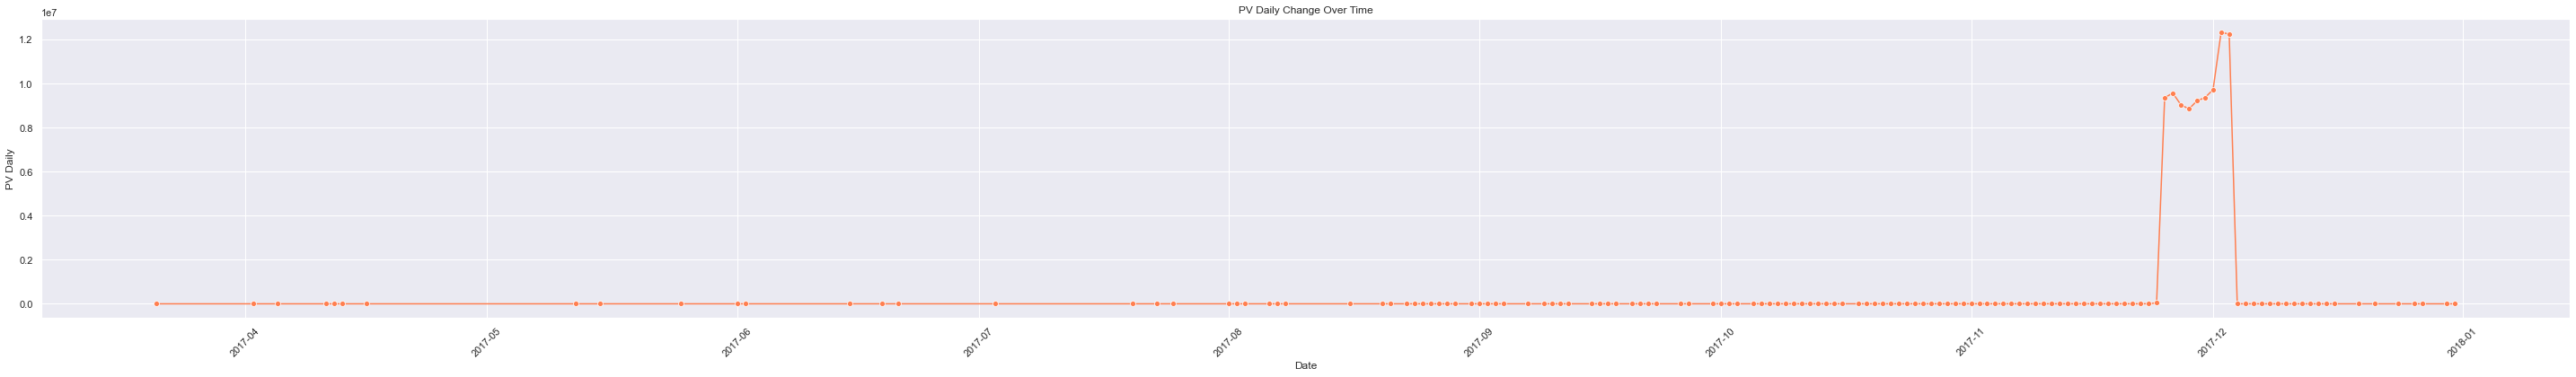

In [13]:
# Using seaborn for plotting
sns.set(style = "darkgrid")
plt.figure(figsize = (40, 6))
sns.lineplot(x = 'date', y = 'pv_daily', data = pv_daily, marker = 'o', color = 'coral')

plt.title('PV Daily Change Over Time')
plt.xlabel('Date')
plt.ylabel('PV Daily')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
pv_daily['date'] = pd.to_datetime(pv_daily['date'])
pv_daily_filtered = pv_daily[(pv_daily.date>=datetime.datetime.strptime("2017-11-20 00:00:00","%Y-%m-%d %H:%M:%S"))
        &(pv_daily.date<=datetime.datetime.strptime("2017-12-05 23:59:59","%Y-%m-%d %H:%M:%S"))]

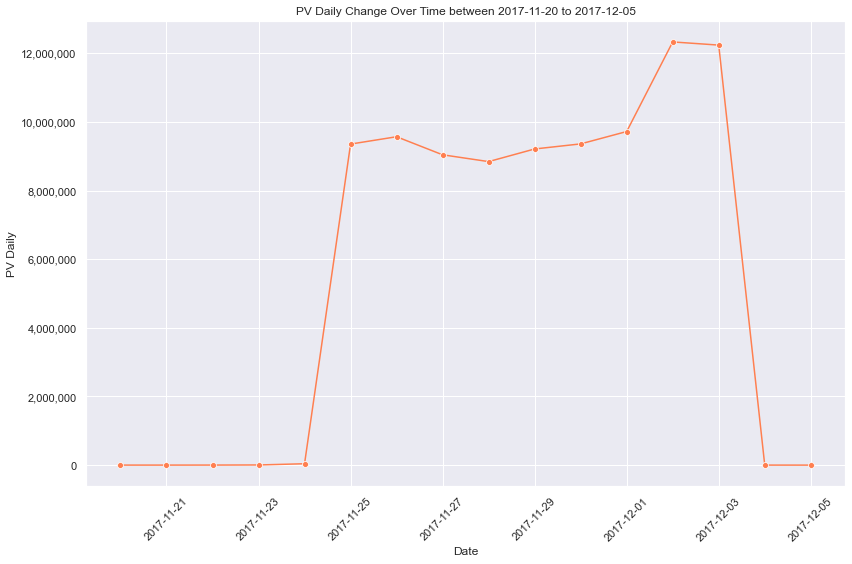

In [15]:
# Plot between 2017-11-20 to 2017-12-05
import matplotlib.ticker as ticker
sns.set(style = "darkgrid")
plt.figure(figsize = (12, 8))
ax = sns.lineplot(x = 'date', y = 'pv_daily', data = pv_daily_filtered, marker = 'o', color = 'coral')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('PV Daily Change Over Time between 2017-11-20 to 2017-12-05')
plt.xlabel('Date')
plt.ylabel('PV Daily')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Daily Unique Visit
# UV: select count(distinct(user_id)) from user_data group by "date";
uv_daily = user_data.groupby('date')['user_id'].apply(lambda x: len(x.unique()))
uv_daily = uv_daily.reset_index()
uv_daily = uv_daily.rename(columns = {'user_id':'uv_daily'})
uv_daily.head(10)

,date,uv_daily
0,2017-03-21,1
1,2017-04-02,1
2,2017-04-05,1
3,2017-04-11,1
4,2017-04-12,1
5,2017-04-13,2
6,2017-04-16,1
7,2017-05-12,1
8,2017-05-15,2
9,2017-05-25,1


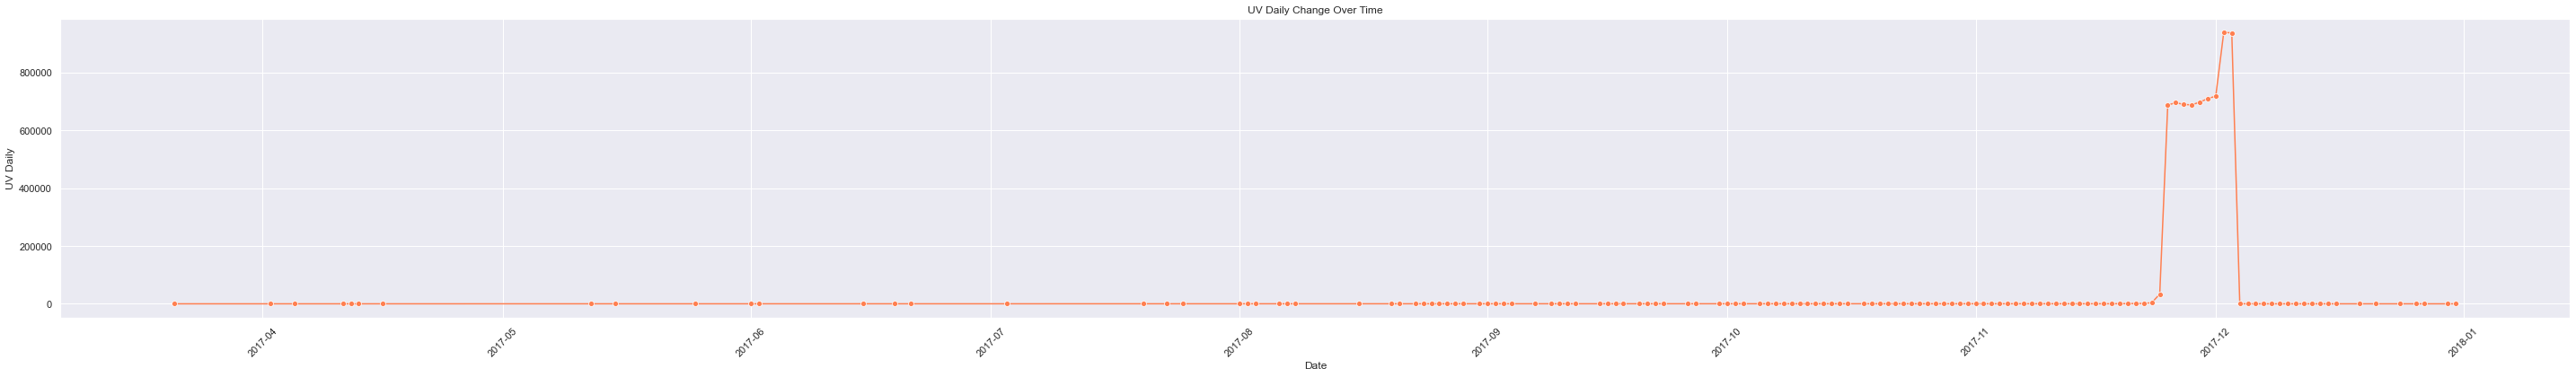

In [17]:
# Using seaborn for plotting
sns.set(style = "darkgrid")
plt.figure(figsize = (40, 6))
sns.lineplot(x = 'date', y = 'uv_daily', data = uv_daily, marker = 'o', color = 'coral')

plt.title('UV Daily Change Over Time')
plt.xlabel('Date')
plt.ylabel('UV Daily')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
uv_daily['date'] = pd.to_datetime(uv_daily['date'])
uv_daily_filtered = uv_daily[(uv_daily.date>=datetime.datetime.strptime("2017-11-20 00:00:00","%Y-%m-%d %H:%M:%S"))
        &(uv_daily.date<=datetime.datetime.strptime("2017-12-05 23:59:59","%Y-%m-%d %H:%M:%S"))]

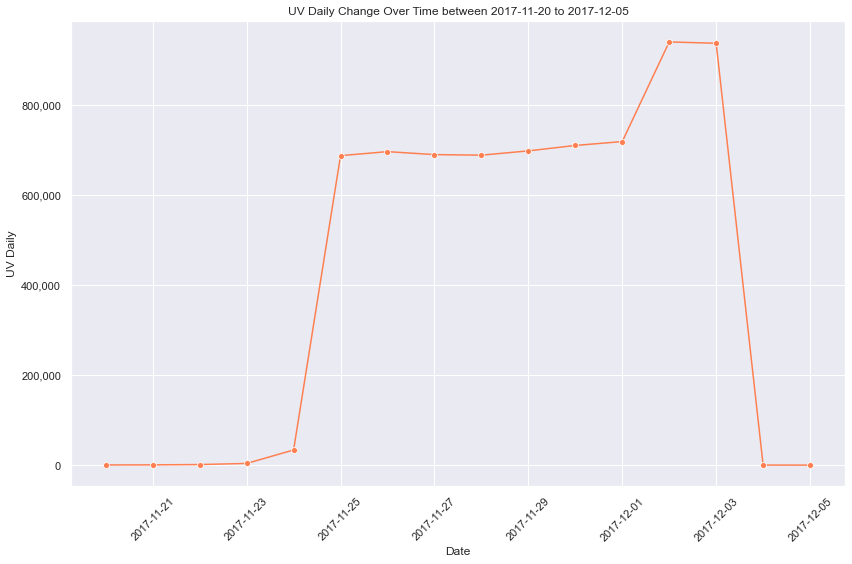

In [21]:
# Plot between 2017-11-20 to 2017-12-05
sns.set(style = "darkgrid")
plt.figure(figsize = (12, 8))
ax = sns.lineplot(x = 'date', y = 'uv_daily', data = uv_daily_filtered, marker = 'o', color = 'coral')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('UV Daily Change Over Time between 2017-11-20 to 2017-12-05')
plt.xlabel('Date')
plt.ylabel('UV Daily')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Conclusion
1. (Nov 25-26, Dec 2-3: weekend) Weekend clicks are higher than on weekdays, likely because users have more time to browse Taobao. 

2. The daily page view and unique page view increased significantly from 2017-11-23 to 2017-12-03 and peaked on December 2, 2017.

3. Although both November 25, 2017, and December 2, 2017, are Saturdays, the increase in clicks on December 2 was particularly notable. This surge can likely be attributed to Taobao's warm-up campaign for the "12-12 Sale" on that day, thus attracting more clicks.

In [7]:
# Filter data between 2017-11-24 and 2017-12-03 and save for further processing
userdata_filtered = user_data[(user_data.date>=datetime.datetime.strptime("2017-11-24 00:00:00","%Y-%m-%d %H:%M:%S"))
        &(user_data.date<=datetime.datetime.strptime("2017-12-03 23:59:59","%Y-%m-%d %H:%M:%S"))]
userdata_filtered.to_csv('userdata.csv')

In [2]:
# Speed up processing
ud = pd.read_csv('userdata.csv')
ud.head()

,Unnamed: 0,user_id,item_id,category_id,behavior_type,timestamp,date,hour
0,0,1,2333346,2520771,pv,2017-11-25 06:15:33,2017-11-25,6
1,1,1,2576651,149192,pv,2017-11-25 09:21:25,2017-11-25,9
2,2,1,3830808,4181361,pv,2017-11-25 15:04:53,2017-11-25,15
3,3,1,4365585,2520377,pv,2017-11-25 15:49:06,2017-11-25,15
4,4,1,4606018,2735466,pv,2017-11-25 21:28:01,2017-11-25,21


In [3]:
ud['date'] = pd.to_datetime(ud['date'])

Based on hour:

In [2]:
# Hourly PV
pv_data = ud[ud['behavior_type'] == 'pv']
pv_data['date'] = pd.to_datetime(pv_data['date'])

pv_hour = pv_data.groupby('hour')['user_id'].count().reset_index(name='pv_hour')
pv_hour.head()

/var/folders/k4/6n6fnmms3yj2wtcz594vpw2r0000gn/T/ipykernel_2968/934235679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv_data['date'] = pd.to_datetime(pv_data['date'])


,hour,pv_hour
0,0,3057260
1,1,1421836
2,2,769328
3,3,525034
4,4,449681


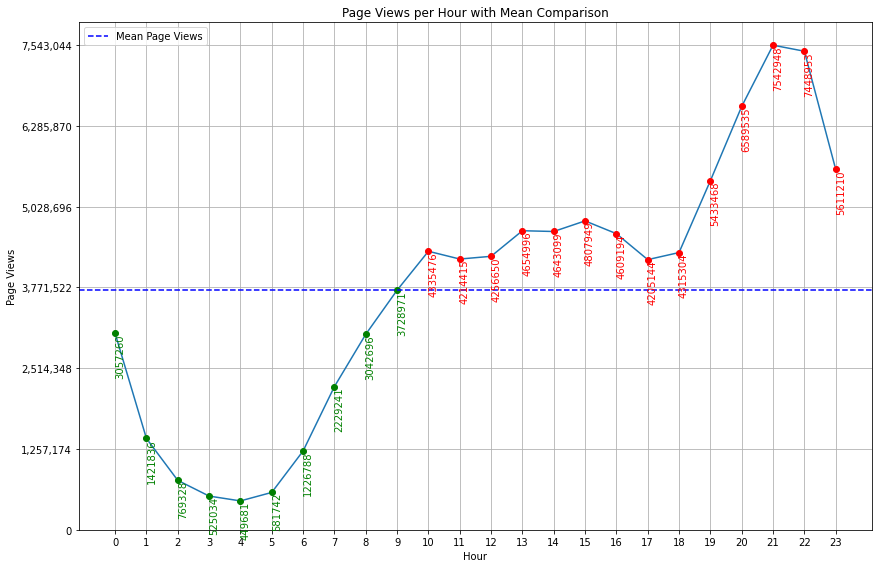

In [3]:
import matplotlib.ticker as ticker
mean_pv_hour = pv_hour['pv_hour'].mean()

# Plotting
plt.figure(figsize = (12, 8))
sns.lineplot(x = 'hour', y = 'pv_hour', data = pv_hour, marker = 'o', palette = 'red')

# Adding labels for each point to show the value of pv_hour
for x, y in zip(pv_hour['hour'], pv_hour['pv_hour']):
    color = 'red' if y > mean_pv_hour else 'green'
    plt.text(x, y + 50, f"{y}", color = color, ha = 'left', size = 'medium', va = 'top', rotation = 'vertical')  # Adjust the position by horizontalalignment
    plt.plot(x, y, marker = 'o', color = color)

plt.axhline(mean_pv_hour, color = 'blue', linestyle = '--', label = 'Mean Page Views')
plt.title('Page Views per Hour with Mean Comparison')
plt.xlabel('Hour')
plt.ylabel('Page Views')
plt.xticks(range(0, 24))
max_pv = max(pv_hour['pv_hour'])
step = (max_pv + 100) // 6  # Dividing the range into fewer steps for sparsity
plt.yticks(np.arange(0, max_pv + step, step = step))
plt.legend()
plt.grid(True)
plt.tight_layout()

# Setting y-axis to display actual values instead of scientific notation
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

In [4]:
# Hourly UV
uv_hour = ud.groupby('hour')['user_id'].apply(lambda x: len(x.unique()))
uv_hour = uv_hour.reset_index()
uv_hour = uv_hour.rename(columns={'user_id':'uv_hour'})
uv_hour.head()

,hour,uv_hour
0,0,318493
1,1,167481
2,2,98369
3,3,71438
4,4,64244


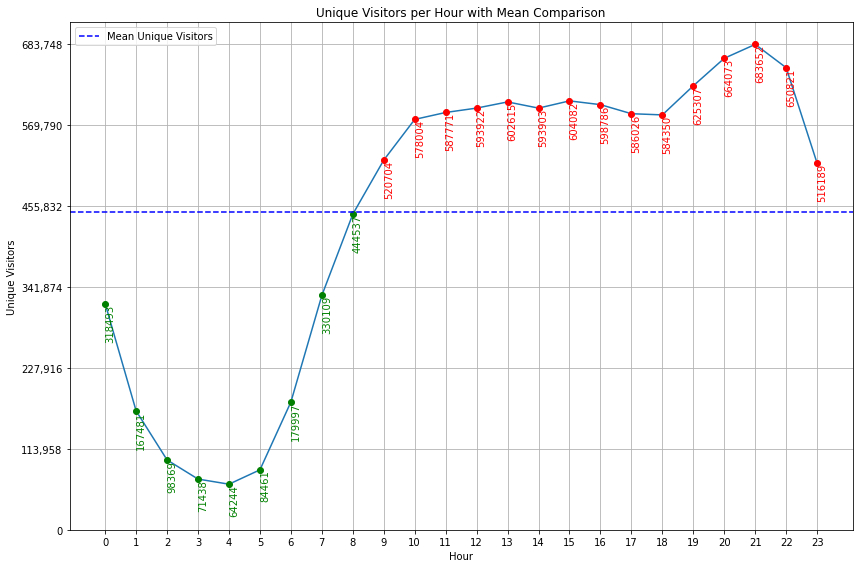

In [5]:
mean_uv_hour = uv_hour['uv_hour'].mean()

# Plotting
plt.figure(figsize = (12, 8))
sns.lineplot(x = 'hour', y = 'uv_hour', data = uv_hour, marker = 'o', palette = 'red')

# Adding labels for each point to show the value of uv_hour
for x, y in zip(uv_hour['hour'], uv_hour['uv_hour']):
    color = 'red' if y > mean_uv_hour else 'green'
    plt.text(x, y + 50, f"{y}", color = color, ha = 'left', size = 'medium', va = 'top', rotation = 'vertical')  # Adjust the position by horizontalalignment
    plt.plot(x, y, marker = 'o', color = color)

plt.axhline(mean_uv_hour, color = 'blue', linestyle = '--', label = 'Mean Unique Visitors')
plt.title('Unique Visitors per Hour with Mean Comparison')
plt.xlabel('Hour')
plt.ylabel('Unique Visitors')
plt.xticks(range(0, 24))
max_uv = max(uv_hour['uv_hour'])
step = (max_uv + 100) // 6  # Dividing the range into fewer steps for sparsity
plt.yticks(np.arange(0, max_uv + step, step = step))
plt.legend()
plt.grid(True)
plt.tight_layout()

# Setting y-axis to display actual values instead of scientific notation
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

In [21]:
# Compare indicators on weekdays and weekend
import datetime
ud_weekend = ud[(ud.date>=datetime.datetime.strptime("2017-12-2 00:00:00","%Y-%m-%d %H:%M:%S"))
        &(ud.date<=datetime.datetime.strptime("2017-12-3 23:59:59","%Y-%m-%d %H:%M:%S"))]
ud_weekday = ud[(ud.date>=datetime.datetime.strptime("2017-11-27 00:00:00","%Y-%m-%d %H:%M:%S"))
        &(ud.date<=datetime.datetime.strptime("2017-11-28 23:59:59","%Y-%m-%d %H:%M:%S"))]

In [22]:
pvweekend_data = ud_weekend[ud_weekend['behavior_type'] == 'pv']                
pvweekend_data['date'] = pd.to_datetime(pvweekend_data['date'])
pvweekend_hour = pvweekend_data.groupby('hour')['user_id'].count().reset_index(name='pv_hour')
pvweekend_hour.head()

/var/folders/k4/6n6fnmms3yj2wtcz594vpw2r0000gn/T/ipykernel_2968/3891443481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pvweekend_data['date'] = pd.to_datetime(pvweekend_data['date'])


,hour,pv_hour
0,0,895814
1,1,428150
2,2,226616
3,3,149590
4,4,122562


In [23]:
pvweekday_data = ud_weekday[ud_weekday['behavior_type'] == 'pv']
pvweekday_data['date'] = pd.to_datetime(pvweekday_data['date'])
pvweekday_hour = pvweekday_data.groupby('hour')['user_id'].count().reset_index(name='pv_hour')
pvweekday_hour.head()

/var/folders/k4/6n6fnmms3yj2wtcz594vpw2r0000gn/T/ipykernel_2968/3829436240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pvweekday_data['date'] = pd.to_datetime(pvweekday_data['date'])


,hour,pv_hour
0,0,611764
1,1,271821
2,2,148193
3,3,103401
4,4,91574


In [24]:
uvweekend_hour = ud_weekend.groupby('hour')['user_id'].apply(lambda x: len(x.unique()))
uvweekend_hour = uvweekend_hour.reset_index()
uvweekend_hour = uvweekend_hour.rename(columns={'user_id':'uv_hour'})
uvweekend_hour.head()

,hour,uv_hour
0,0,140542
1,1,67827
2,2,36558
3,3,24772
4,4,21725


In [25]:
uvweekday_hour = ud_weekday.groupby('hour')['user_id'].apply(lambda x: len(x.unique()))
uvweekday_hour = uvweekday_hour.reset_index()
uvweekday_hour = uvweekday_hour.rename(columns={'user_id':'uv_hour'})
uvweekday_hour.head()

,hour,uv_hour
0,0,97102
1,1,43774
2,2,24359
3,3,17692
4,4,16129


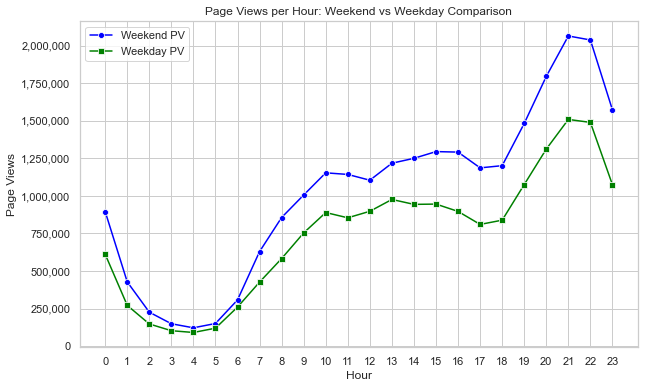

In [27]:
# Plot the comparison of PV
sns.set(style = "whitegrid")
plt.figure(figsize = (10, 6))
sns.lineplot(x = 'hour', y = 'pv_hour', data = pvweekend_hour, marker = 'o', label = 'Weekend PV', color = 'blue')
sns.lineplot(x = 'hour', y = 'pv_hour', data = pvweekday_hour, marker = 's', label = 'Weekday PV', color = 'green')

plt.title('Page Views per Hour: Weekend vs Weekday Comparison')
plt.xlabel('Hour')
plt.ylabel('Page Views')
plt.xticks(range(0, 24))  # Ensure the x-axis covers each hour of the day
plt.legend()

import matplotlib.ticker as ticker
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

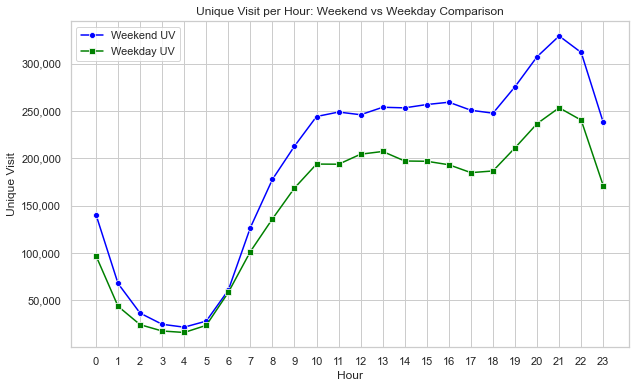

In [28]:
# Plot the comparison of UV
sns.set(style = "whitegrid")
plt.figure(figsize = (10, 6))
sns.lineplot(x = 'hour', y = 'uv_hour', data = uvweekend_hour, marker = 'o', label = 'Weekend UV', color = 'blue')
sns.lineplot(x = 'hour', y = 'uv_hour', data = uvweekday_hour, marker = 's', label = 'Weekday UV', color = 'green')

plt.title('Unique Visit per Hour: Weekend vs Weekday Comparison')
plt.xlabel('Hour')
plt.ylabel('Unique Visit')
plt.xticks(range(0, 24))  # Ensure the x-axis covers each hour of the day
plt.legend()

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

#### Conclusion
1. Hourly page view and unique visit could show the user's active use time. The data reached the minimum at 4 and peaked at 21. This is likely because users are mostly from the working class.

2. There's significant increase from 5 to 10 and from 18 to 21. And the data fluctuated from 10 to 18. It could be inferred that users prefer to use Taobao after wake-up time and before sleep time.

3. By comparing weekend and weekday data, it can be observed that the trends are generally consistent. However, the volume of active users during the daytime on weekends far exceeds that of weekdays.

Based on different user behaviors & hour:

In [4]:
# Behavior type: pv (page view), fav (add to the wishlist), cart (add to the cart), buy (buy)
pv_behavior = ud.groupby(['behavior_type','hour'])['user_id'].count()
pv_behavior = pv_behavior.reset_index()
pv_behavior = pv_behavior.rename(columns={'user_id':'pv_behavior'})
pv_behavior.head(10)

,behavior_type,hour,pv_behavior
0,buy,0,57776
1,buy,1,23169
2,buy,2,12012
3,buy,3,8026
4,buy,4,6748
5,buy,5,8135
6,buy,6,18014
7,buy,7,37679
8,buy,8,64917
9,buy,9,96134


<AxesSubplot:xlabel='hour', ylabel='pv_behavior'>

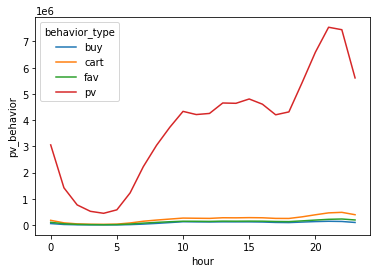

In [5]:
# Plot
sns.lineplot(x='hour',y='pv_behavior',hue='behavior_type',data=pv_behavior)

<AxesSubplot:xlabel='hour', ylabel='pv_behavior'>

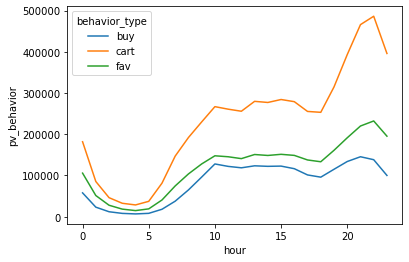

In [6]:
# Since pv dominated the trend, filter pv and plot
sns.lineplot(x='hour',y='pv_behavior',hue='behavior_type',data=pv_behavior[pv_behavior.behavior_type!='pv'])

#### Conclusion
Trend of four different user behaviors changing over time is consistent. It increased after 18 and reached the minimum around 2-6.

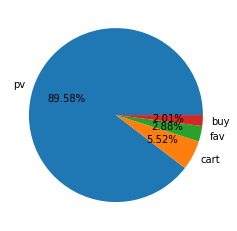

In [5]:
# User behavior distribution
type_series = ud.behavior_type.value_counts()
plt.figure()
plt.pie(x=type_series,labels=type_series.index,autopct='%1.2f%%')
plt.show()

In [17]:
# Calculate coversion rate and bounce rate
behavior_type = ud.groupby(['behavior_type'])['user_id'].count()

pv_num, fav_num, cart_num, buy_num =  behavior_type['pv'], behavior_type['fav'], behavior_type['cart'], behavior_type['buy']

fav_cart_num = fav_num + cart_num 
print(f"cart/fav conversion rate: {(fav_cart_num / pv_num):.2%}")
print(f"click-to-buy conversion rate: {(buy_num / pv_num):.2%}")
print(f"cart/fav-to-buy conversion rate: {(buy_num / fav_cart_num):.2%}")

cart/fav conversion rate: 9.39%
click-to-buy conversion rate: 2.25%
cart/fav-to-buy conversion rate: 23.94%


In [15]:
total_unique_users = ud.user_id.nunique()
pv_users = ud[ud['behavior_type'] == 'pv']
user_behaviors_count = ud.groupby('user_id').nunique()
only_pv_users = user_behaviors_count[user_behaviors_count['behavior_type'] == 1]
only_pv_users_count = only_pv_users.shape[0]
bounce_rate = only_pv_users_count / total_unique_users

print(f"Bounce Rate: {bounce_rate:.2%}")

Bounce Rate: 6.08%


#### Conclusion
1. Page view takes up 89.6% of user behaviors. The conversion rate from "page view" to "add to cart" or "add to favourite" is approximately 9.4%. The conversion rate from "page view" to "buy" is approximately 2.3%.

2. The conversion rate from "add to cart" or "add to favourite" to "buy" is approximately 23.9%.

3. About 6.1% users leave Taobao after page view.

### User value analysis
Based on RFM Model: R--Recency(✓), F--Frequency(✓), M--Monetary value(no data)

In [20]:
# Method 1: setting metrics to evaluate and classify paying users
buy_userid = ud[ud['behavior_type'] == 'buy'].groupby('user_id')
buy_userid.head(5)

,Unnamed: 0,user_id,item_id,category_id,behavior_type,timestamp,date,hour
70,70,100,1603476,2951233,buy,2017-11-25 11:18:28,2017-11-25,11
72,72,100,2971043,4869428,buy,2017-11-25 21:45:49,2017-11-25,21
99,99,100,598929,2429887,buy,2017-11-27 13:10:58,2017-11-27,13
118,118,100,1046201,3002561,buy,2017-11-27 15:21:38,2017-11-27,15
124,124,100,1606258,4098232,buy,2017-11-27 21:39:00,2017-11-27,21
...,...,...,...,...,...,...,...,...
100135040,100150385,99999,1309907,2939262,buy,2017-11-26 10:43:59,2017-11-26,10
100135342,100150687,999996,120487,3439012,buy,2017-11-29 21:33:04,2017-11-29,21
100135343,100150688,999996,4324714,873792,buy,2017-11-29 21:36:51,2017-11-29,21
100135348,100150693,999996,3046611,873792,buy,2017-11-29 21:46:03,2017-11-29,21


In [23]:
RF = pd.DataFrame(index = buy_userid.groups.keys(), columns = ['R', 'F'])
RF['F'] = buy_userid['behavior_type'].count()

# Define Recency as time between the last purchase and 2017-12-04
RF['last_buy_time'] = buy_userid['date'].max()
RF['R'] = (pd.to_datetime('2017-12-04') - RF['last_buy_time']).dt.days
RF[['R','F']].describe().style.format('{:.2f}')

,R,F
count,672404.00,672404.00
mean,3.56,3.00
std,2.42,2.89
min,1.00,1.00
25%,1.00,1.00
50%,3.00,2.00
75%,5.00,4.00
max,9.00,262.00


In [24]:
# Define Recency score
def R_score(x):
    if 0 <= x <= 1:
        return 4
    elif 2 <= x <= 3:
        return 3
    elif 4 <= x <= 6:
        return 2
    elif 7 <= x <= 9:
        return 1
    else:
        return 0

RF['R_score'] = RF.R.map(R_score)

In [25]:
# Define Frequency score
def F_score(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    elif x == 3:
        return 3
    elif x >= 4:
        return 4
    else:
        return 0

RF['F_score'] = RF.F.map(F_score)

In [26]:
RF['R>mean?']=(RF['R_score']>RF['R_score'].mean())*1
RF['F>mean?']=(RF['F_score']>RF['F_score'].mean())*1

In [27]:
# Classify based on whether the score > mean to four kinds of customers: 
# Retaining Customers
# Developing Customers
# Valuable Customers
# Winning Back Customers

def user_classfication(tup):
    R_score, F_score = tup
    if R_score == 0 and F_score == 1:
        return "Retaining Customers"
    elif R_score == 1 and F_score == 0:
        return "Developing Customers"
    elif R_score == 1 and F_score == 1:
        return "Valuable Customers"
    elif R_score == 0 and F_score == 0:
        return "Winning Back Customers"
    else:
        return None

RF['user_classification'] = RF[['R>mean?','F>mean?']].apply(user_classfication, axis=1)

In [28]:
classification_counts=RF['user_classification'].value_counts()
classification_counts

Valuable Customers        208314
Winning Back Customers    208173
Developing Customers      177613
Retaining Customers        78304
Name: user_classification, dtype: int64

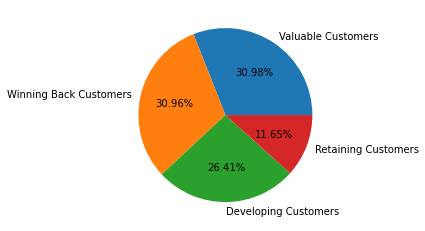

In [29]:
# Visualize results
plt.figure()
plt.pie(x=classification_counts, labels=classification_counts.index,autopct='%1.2f%%')
plt.show()

In [4]:
# Method 2: K-means clustering
ud_cluster = ud.drop(columns = ['Unnamed: 0','timestamp'])
ud_cluster.head()

,user_id,item_id,category_id,behavior_type,date,hour
0,1,2333346,2520771,pv,2017-11-25,6
1,1,2576651,149192,pv,2017-11-25,9
2,1,3830808,4181361,pv,2017-11-25,15
3,1,4365585,2520377,pv,2017-11-25,15
4,1,4606018,2735466,pv,2017-11-25,21


In [5]:
# Feature selection
from datetime import datetime
visit_cnt = ud_cluster.groupby(by=["user_id"]).size()

trans_rate = (
    ud_cluster.groupby(by=["user_id"])["behavior_type"].agg(lambda x: x[x == 'buy'].size)
    / visit_cnt
)

life_cycle = ud_cluster.groupby(by=["user_id"])["date"].agg(lambda x: max(x) - min(x))

rfm = ud_cluster.groupby(by=["user_id"]).agg(
    {
        "date": lambda x: datetime(2017, 12, 5) - max(x),
        "behavior_type": lambda x: x[x == 'buy'].count(),
    }
)

In [6]:
ud_feat = pd.DataFrame(
    {
        "user_id": visit_cnt.index,
        "trans_rate": trans_rate.values,
        "visit_cnt": visit_cnt.values,
        "life_cycle": life_cycle.values,
        "R": rfm["date"].values,
        "F": rfm["behavior_type"].values,
    }
)
ud_feat.head()

,user_id,trans_rate,visit_cnt,life_cycle,R,F
0,1,0.000000,54,8 days,2 days,0
1,2,0.098592,71,8 days,2 days,7
2,3,0.000000,53,8 days,2 days,0
3,4,0.014035,285,8 days,2 days,4
4,5,0.000000,64,6 days,3 days,0


In [7]:
ud_feat["visit_cnt"] = ud_feat["visit_cnt"].astype("object")
ud_feat["trans_rate"] = ud_feat["trans_rate"].astype("object")
ud_feat["life_cycle"] = ud_feat["life_cycle"].map(lambda x: x.days).astype("object")
ud_feat["R"] = ud_feat["R"].map(lambda x: x.days).astype("object")
ud_feat["F"] = ud_feat["F"].astype("object")
ud_feat.dtypes

user_id        int64
trans_rate    object
visit_cnt     object
life_cycle    object
R             object
F             object
dtype: object

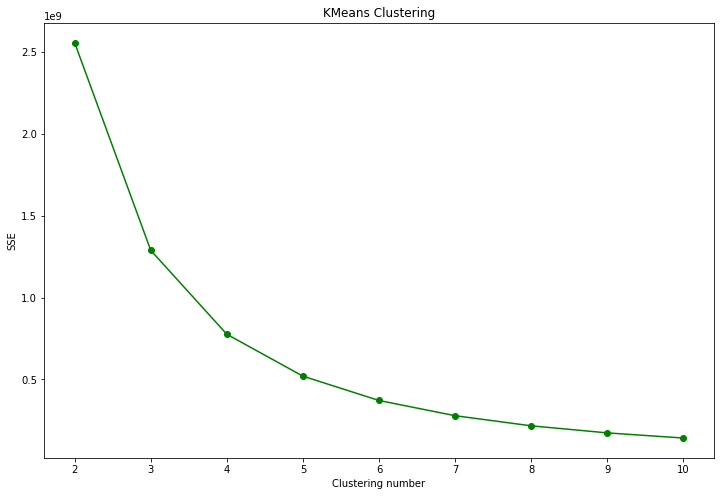

In [22]:
# SSE
from sklearn.cluster import KMeans
sse_list = [ ] 
for i in k: 
    kmeans = KMeans(n_clusters=i) 
    kmeans.fit(X) 
    sse_list.append(kmeans.inertia_)
    
plt.figure() 
plt.plot(k, sse_list, 'go-')
plt.xlabel('Clustering number')
plt.ylabel('SSE')
plt.title('KMeans Clustering')
plt.show()

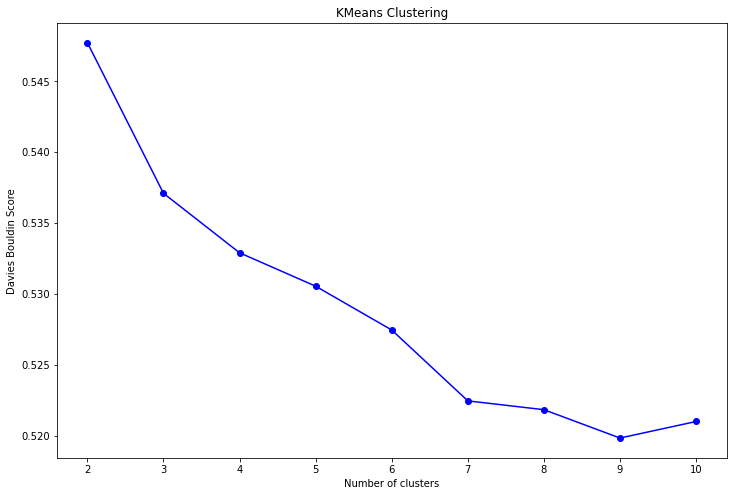

In [30]:
from sklearn.metrics import davies_bouldin_score

X = ud_feat[["trans_rate", "visit_cnt", "life_cycle"]]
k = range(2, 11)
labels_list = []

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=1502).fit(X)
    labels = kmeans.labels_
    labels_list.append(labels)

davies_bouldin_scores = [davies_bouldin_score(X, labels) for labels in labels_list]

plt.plot(k,davies_bouldin_scores,'bo-')
plt.xlabel('Number of clusters') 
plt.ylabel('Davies Bouldin Score')
plt.title('KMeans Clustering')
plt.show()

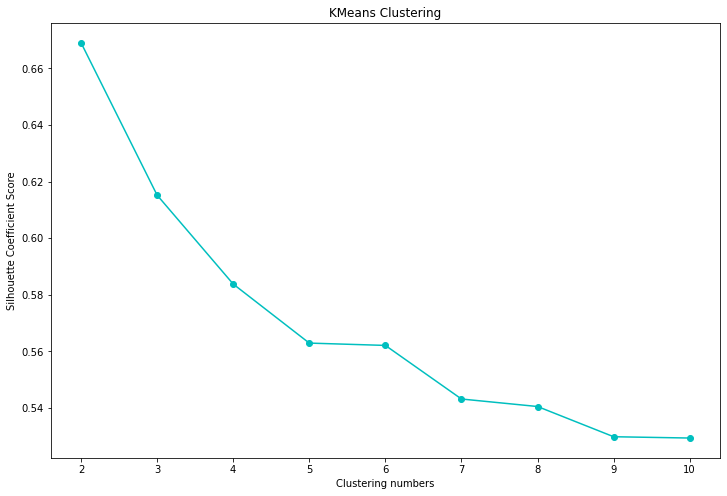

In [29]:
# Silhouette Coefficient Score
from sklearn.metrics import silhouette_score

sc_scores = []
for i in k:  
    kmeans_model = KMeans(n_clusters=i).fit(X)
    sc_score = silhouette_score(X, kmeans_model.labels_\
                        ,sample_size=10000, metric='euclidean')
    sc_scores.append(sc_score)

plt.figure()
plt.plot(k, sc_scores, 'co-')
plt.xlabel('Clustering numbers')
plt.ylabel('Silhouette Coefficient Score')
plt.title('KMeans Clustering')
plt.show()

For k value: <br>
    SSE result suggests that 3-5 performs better;<br>
    Davies Bouldin Score suggests that 4-10 performs better;<br>
    Silhouette Coefficient Score suggests that 2-4 performs better.<br>
k = 4: all matrics are in good performance, and users are devided into four groups which could show more details in different groups and thus promotes business strategies.

In [32]:
kmeans = KMeans(4, random_state=1234).fit(X)

labels = kmeans.labels_  # assign each sample a cluster number
centers = kmeans.cluster_centers_  # find the center of each cluster

ud_feat["cluster"] = labels
# add a column with labels to the user_feat dataframe for each row

ud_feat.head(10)

,user_id,trans_rate,visit_cnt,life_cycle,R,F,cluster
0,1,0.0,54,8,2,0,0
1,2,0.098592,71,8,2,7,0
2,3,0.0,53,8,2,0,0
3,4,0.014035,285,8,2,4,1
4,5,0.0,64,6,3,0,0
5,6,0.0,129,8,2,0,2
6,7,0.0,96,8,2,0,2
7,8,0.0,21,8,2,0,0
8,9,0.0,59,6,2,0,0
9,10,0.0,46,6,2,0,0


In [33]:
%matplotlib inline

cluster_size = ud_feat.groupby("cluster").size().reset_index(name="size")
cluster_size

,cluster,size
0,0,507026
1,1,140993
2,2,298522
3,3,41451


In [50]:
users_0 = ud_feat[ud_feat['cluster'] == 0].drop(columns = ['user_id','cluster'])
columns_to_convert = ['trans_rate', 'visit_cnt', 'life_cycle', 'R', 'F']
users_0 = users_0.astype({col: 'float32' for col in columns_to_convert})
users_0.describe().style.format('{:.2f}')

,trans_rate,visit_cnt,life_cycle,R,F
count,507026.00,507026.00,507026.00,507026.00,507026.00
mean,0.04,40.87,7.26,2.04,1.40
std,0.06,19.55,1.22,0.25,1.89
min,0.00,1.00,0.00,2.00,0.00
25%,0.00,25.00,7.00,2.00,0.00
50%,0.02,40.00,8.00,2.00,1.00
75%,0.06,57.00,8.00,2.00,2.00
max,1.00,77.00,9.00,11.00,68.00


In [51]:
users_1 = ud_feat[ud_feat['cluster'] == 1].drop(columns = ['user_id','cluster'])
users_1 = users_1.astype({col: 'float32' for col in columns_to_convert})
users_1.describe().style.format('{:.2f}')

,trans_rate,visit_cnt,life_cycle,R,F
count,140993.00,140993.00,140993.00,140993.00,140993.00
mean,0.01,213.49,7.87,2.01,3.15
std,0.02,35.73,0.61,0.08,3.73
min,0.00,164.00,2.00,2.00,0.00
25%,0.00,183.00,8.00,2.00,1.00
50%,0.01,207.00,8.00,2.00,2.00
75%,0.02,240.00,8.00,2.00,4.00
max,0.76,293.00,9.00,5.00,177.00


In [52]:
users_2 = ud_feat[ud_feat['cluster'] == 2].drop(columns = ['user_id','cluster'])
users_2 = users_2.astype({col: 'float32' for col in columns_to_convert})
users_2.describe().style.format('{:.2f}')

,trans_rate,visit_cnt,life_cycle,R,F
count,298522.00,298522.00,298522.00,298522.00,298522.00
mean,0.02,113.47,7.72,2.01,2.35
std,0.03,24.19,0.80,0.10,2.80
min,0.00,78.00,2.00,2.00,0.00
25%,0.00,92.00,8.00,2.00,0.00
50%,0.01,110.00,8.00,2.00,2.00
75%,0.03,133.00,8.00,2.00,3.00
max,0.99,163.00,9.00,6.00,131.00


In [53]:
users_3 = ud_feat[ud_feat['cluster'] == 3].drop(columns = ['user_id','cluster'])
users_3 = users_3.astype({col: 'float32' for col in columns_to_convert})
users_3.describe().style.format('{:.2f}')

,trans_rate,visit_cnt,life_cycle,R,F
count,41451.00,41451.00,41451.00,41451.00,41451.00
mean,0.01,372.52,7.95,2.00,3.86
std,0.01,73.96,0.49,0.05,4.71
min,0.00,294.00,2.00,2.00,0.00
25%,0.00,318.00,8.00,2.00,1.00
50%,0.01,350.00,8.00,2.00,3.00
75%,0.01,405.00,8.00,2.00,5.00
max,0.84,848.00,9.00,4.00,262.00


1. 4 categories are divided with the largest size 507026 and the smallest size 41451, which makes sense.
<br>
2. Compare the four user groups:<br>
    Mean:<br>
    trans_rate: 0>2>1=3<br>
    visit_cnt: 3>1>2>0<br>
    life_cycle: 3>1>2>0<br>
    R: 0>1=2>3<br>
    F: 3>1>2>0<br>
    Std:<br>
    trans_rate: 0>2>1>3<br>
    visit_cnt: 3>1>2>0<br>
    life_cycle: 0>2>1>3<br>
    R: 0>2>1>3<br>
    F: 3>1>2>0<br>
    category 0: With minimum visit count, purchase frequency and last purchase at the furthest moment, the user group has low consumption users.<br>
    category 1: With top 2 visit count, purchase frequency and last purchase at the 2nd furthest moment, the user group has active users who regularly visit and purchase but the time span of the latest purchase is a bit big.<br>
    category 2: With bottom 2 visit count, purchase frequency and last purchase at the 2nd furthest moment, the user group has inactive users.<br>
    category 3: With maximum visit count, purchase frequency and last purchase at the most recent moment, the user group has active and high consumption users.<br>
<br>
3. Reflect on the previous classification: <br>
    user_0: winning back customers; user_1: developing customers; user_2: retaining customers; user_3: valuable customers

In [54]:
# User purchase frequency distribution
user_buy = ud[ud.behavior_type == 'buy'].groupby('user_id')['behavior_type'].count()
user_buy.head(10)

user_id
2     7
4     4
11    1
16    2
17    1
20    1
24    1
25    3
27    2
28    3
Name: behavior_type, dtype: int64

In [7]:

pd.options.display.float_format = '{:,.2f}'.format
user_buy.describe()

count   672,404.00
mean          3.00
std           2.89
min           1.00
25%           1.00
50%           2.00
75%           4.00
max         262.00
Name: behavior_type, dtype: float64

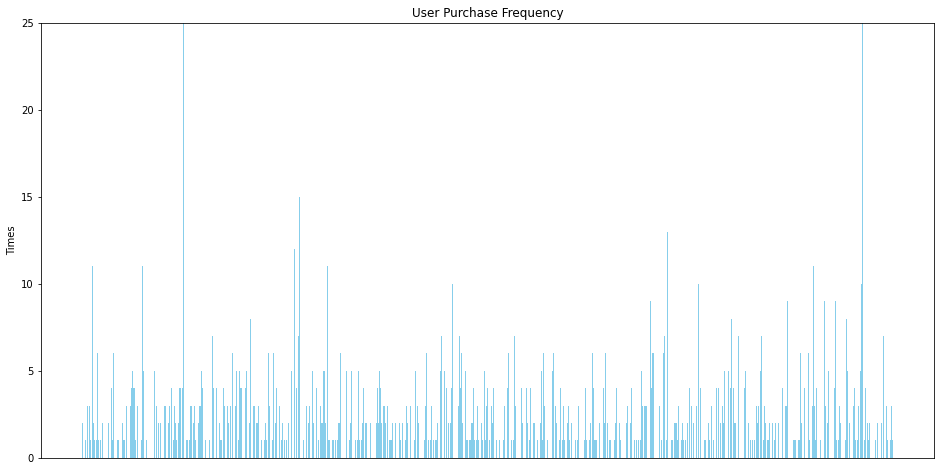

In [36]:
plt.figure(figsize=(16, 8))
plt.bar(user_buy.index, user_buy.values, color='skyblue')

plt.ylabel('Times')
plt.title('User Purchase Frequency')
plt.xticks([])
plt.ylim(0, 25)

plt.show()

#### Conclusion
1. According to recency and frequency indicators, customer group is split into four segments, with different dimensions on indicators presented as following: 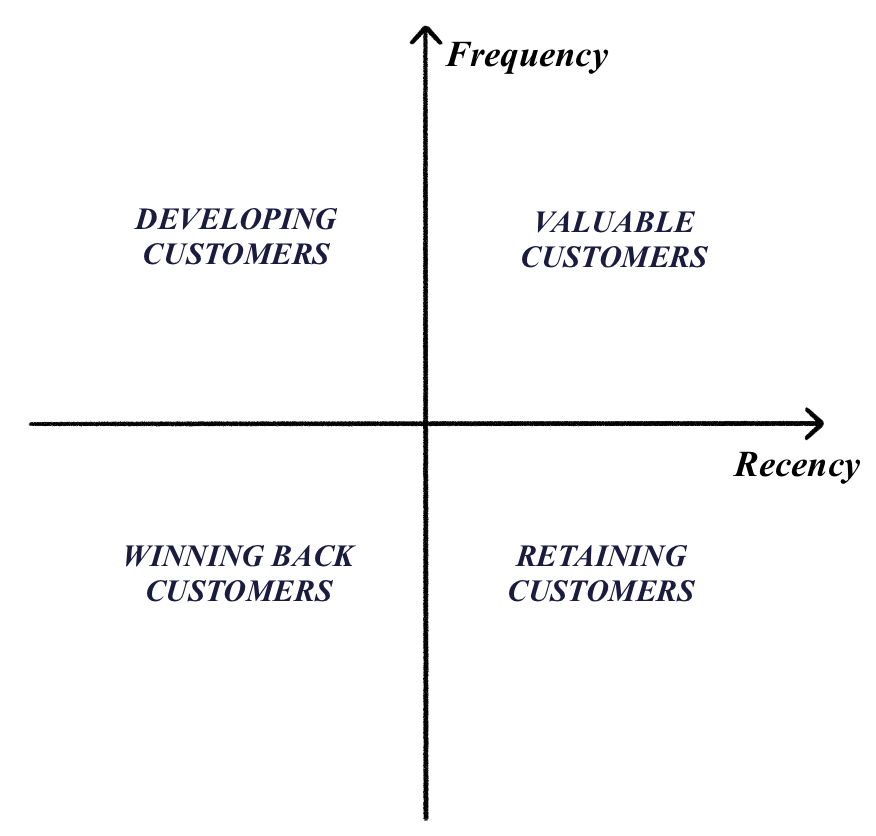
2. Valuable customers constitute 30.98% of the total customer base, the largest segment. These are customers who have made purchases more recently and more frequently than the average.
3. Most customers have purchased 2-3 times. And there are customers who have purchased 262 times.
4. The second largest customer group is the winning back customers, who are about to leave Taobao or have left Taobao, taking up 30.96%.

In [40]:
# ARPU(Average Revenue Per User) = daily purchase times / daily active users
ud['action'] = 1 
ud_arpu = ud.groupby(['date','user_id','behavior_type'])['action'].count()
ud_arpu = ud_arpu.reset_index()
ud_arpu.head(10)

,date,user_id,behavior_type,action
0,2017-11-24,127,pv,1
1,2017-11-24,206,pv,1
2,2017-11-24,215,pv,1
3,2017-11-24,256,pv,1
4,2017-11-24,309,pv,1
5,2017-11-24,348,pv,1
6,2017-11-24,358,pv,1
7,2017-11-24,410,pv,1
8,2017-11-24,422,pv,1
9,2017-11-24,425,pv,1


In [17]:
arpu = ud_arpu.groupby('date').apply(lambda x:x[x['behavior_type']=='buy']['action'].sum() / len(x['user_id'].unique()) ) 
arpu.head(10)

date
2017-11-24   0.00
2017-11-25   0.28
2017-11-26   0.29
2017-11-27   0.32
2017-11-28   0.30
2017-11-29   0.31
2017-11-30   0.30
2017-12-01   0.28
2017-12-02   0.27
2017-12-03   0.27
dtype: float64

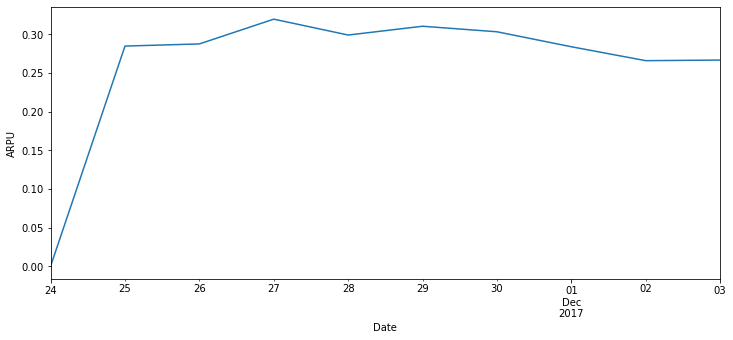

In [22]:
# Plot
plt.figure(figsize=(12, 5))
arpu.plot(linestyle='-')

plt.xlabel('Date')
plt.ylabel('ARPU')
plt.show()

In [28]:
# APPU(Average Purchase Per User) = daily unique paying users / daily active users
appu = ud.groupby('date').apply(lambda x: x[x['behavior_type'] == 'buy']['user_id'].nunique() / len(x['user_id'].unique()))
appu.head(10)

date
2017-11-24   0.00
2017-11-25   0.19
2017-11-26   0.19
2017-11-27   0.21
2017-11-28   0.20
2017-11-29   0.20
2017-11-30   0.20
2017-12-01   0.19
2017-12-02   0.18
2017-12-03   0.18
dtype: float64

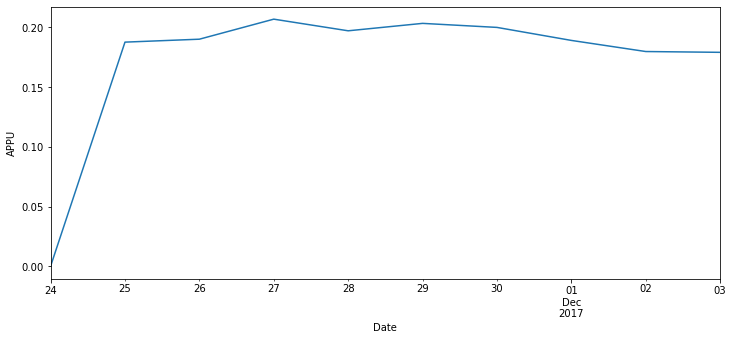

In [29]:
# Plot
plt.figure(figsize=(12, 5))
appu.plot(linestyle='-')

plt.xlabel('Date')
plt.ylabel('APPU')
plt.show()

In [37]:
# Calculate repeated purchase ratio
repeated_purchase_ratio = user_buy[user_buy > 1].count() / user_buy.count()
repeated_purchase_ratio

0.6601061266738449

In [42]:
ud['action'] = 1
ud_re_buy = ud[ud.behavior_type == 'buy']
ud_re_buy = ud_re_buy.groupby(['user_id','date'])['action'].count()
ud_re_buy = ud_re_buy.reset_index()
ud_re_buy.head(10)

,user_id,date,action
0,2,2017-11-28,2
1,2,2017-12-01,1
2,2,2017-12-02,4
3,4,2017-11-28,3
4,4,2017-11-30,1
5,11,2017-11-25,1
6,16,2017-11-30,1
7,16,2017-12-01,1
8,17,2017-12-01,1
9,20,2017-12-01,1


In [47]:
# Filter the first purchase of each pay user
ud_re_buy_diff = ud_re_buy.groupby('user_id').date.apply(lambda x:x.sort_values().diff(1).dropna())
ud_re_buy_diff.head(10)

user_id    
2        1    3 days
         2    1 days
4        4    2 days
16       7    1 days
25       12   2 days
27       14   6 days
39       20   1 days
         21   2 days
         22   2 days
41       25   1 days
Name: date, dtype: timedelta64[ns]

Text(0, 0.5, 'count')

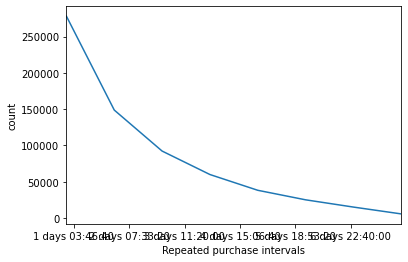

In [49]:
# Plot
ud_re_buy_diff.value_counts().plot(kind='line')

plt.xlabel('Repeated purchase intervals')
plt.ylabel('count')

In [50]:
ud_re_buy_date = ud_re_buy_diff.apply(lambda x:x.days)
ud_re_buy_date.head(10)

user_id    
2        1     3
         2     1
4        4     2
16       7     1
25       12    2
27       14    6
39       20    1
         21    2
         22    2
41       25    1
Name: date, dtype: int64

Text(0, 0.5, 'count')

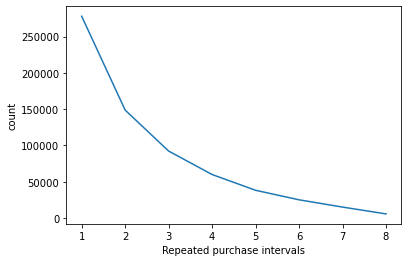

In [51]:
# Plot
ud_re_buy_date.value_counts().plot(kind='line')

plt.xlabel('Repeated purchase intervals')
plt.ylabel('count')

In [31]:
# ARPPU(average revenue per paying user) = Taobao daily revenue(*) / daily paying users
# Since there's no data related to the revenue, sum of daily purchase times would be the substitute.
user_arppu = ud[ud['behavior_type'] == 'buy'].groupby(['date','user_id'])['behavior_type'].count()
user_arppu = user_arppu.reset_index().rename(columns = {'behavior_type':'buy_count'})
user_arppu.head()

,date,user_id,buy_count
0,2017-11-25,11,1
1,2017-11-25,27,1
2,2017-11-25,46,1
3,2017-11-25,80,2
4,2017-11-25,83,1


In [32]:
arppu = user_arppu.groupby('date').apply(lambda x:x['buy_count'].sum() / x['user_id'].count())
arppu.head(10)

date
2017-11-25   1.52
2017-11-26   1.51
2017-11-27   1.54
2017-11-28   1.52
2017-11-29   1.53
2017-11-30   1.52
2017-12-01   1.50
2017-12-02   1.48
2017-12-03   1.49
dtype: float64

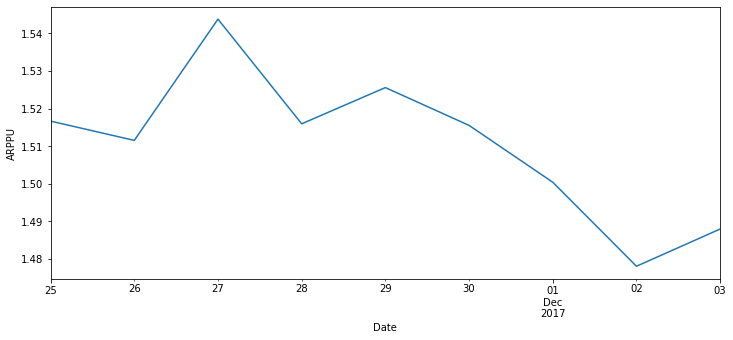

In [33]:
# Plot
plt.figure(figsize=(12, 5))
arppu.plot(linestyle='-')

plt.xlabel('Date')
plt.ylabel('ARPPU')
plt.show()

#### Conclusion
1. Active users purchased around 0.3 times per day on average during Taobao's warm-up campaign for the "12-12 Sale".
2. Average purchase rate among all active users is 20% during Taobao's warm-up campaign for the "12-12 Sale". And the repurchase ratio is 66%. This shows users' tendency to make repeated purchase after the first purchase.
3. Most users repurchase in 4 days after the previous purchase.
4. Average purchase times per paying user peaked at 2017-11-27, which is around 1.55.